# <font style="color:rgb(50,120,229)">Image Classification using Feed Forward Neural Network</font> 
In this notebook, we will use a simple feed forward neural network to peform image classification. 

Traditionally, the "hello world" example in image classification used to be a dataset called MNIST which stood for **Modified National Institute of Standards and Technology** database. It was a dataset of 60,000 training images and 10,000 testing images of hand written characters. The size of the images in the dataset was 28x28.  

With modern methods, it is very easy to achieve high accuracy on the MNIST dataset. 

Therefore, in this notebook, we have chosen to use the **Fashion MNIST** dataset which also consists of 28x28 images, but they are derived from fashion items. Like MNIST, the training set consists of 60,000 images and the test set consists of 10,000 images. 


# <font style="color:rgb(50,120,229)">The Problem</font>

The figure below shows some samples from the Fashion MNIST dataset.

<img src="https://www.dropbox.com/s/m0alzz7m9c6t88u/fashion-mnist-sprite.png?dl=1" width="600">

There are 10 classes. Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


We want to perform image classification on this dataset using a feedforward neural network. The task is to train a machine learning algorithm to recognize a new sample from the test set correctly.

# <font style="color:rgb(50,120,229)">1. The Model</font>

We will use raw pixel values as input to the network. The images are simply matrices of size 28x28. So, we reshape the image matrix to an array of size 784 ( 28*28 ) and feed this array to the network. 

We will use a network with 2 hidden layers having 512 neurons each. 

The output layer will have 10 layers for the 10 fashion items. The schematic diagram is shown below:

<img src="https://www.learnopencv.com/wp-content/uploads/2017/10/mlp-mnist-schematic.jpg" width="700">

# <font style="color:rgb(50,120,229)">2. Load the Data</font>
Keras comes with the Fashion MNIST data loader. It has a function fashion_mnist.load_data() which downloads the data from its servers if it is not present on your computer. The data loaded using this function is divided into training and test sets.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# <font style="color:rgb(50,120,229)">3. Checkout the Data</font>
Let’s see how the data looks like. The data consists of images of fashion items, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28x28 grayscale image.

### <font style="color:rgb(8,133,37)">Labels</font>
Each training and test example is assigned to one of the following labels:

Label	Description
- 0		-> T-shirt/top
- 1		-> Trouser
- 2		-> Pullover
- 3		-> Dress
- 4		-> Coat
- 5		-> Sandal
- 6		-> Shirt
- 7		-> Sneaker
- 8		-> Bag
- 9		-> Ankle boot

Let us create a list which keeps the mapping between class label and description

In [2]:
labelMap = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


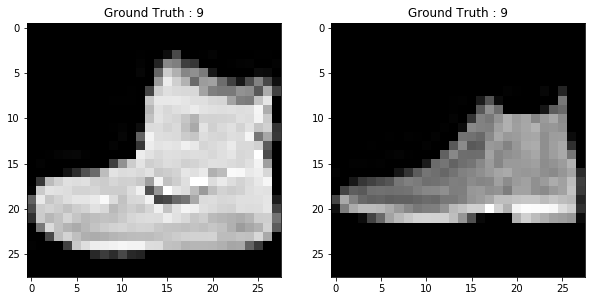

In [3]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]));
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]));

# <font style="color:rgb(50,120,229)">4. Process the data</font>
The images are grayscale and the pixel values range from 0 to 255. We will apply the following preprocessing to the data before feeding it to the network.

Convert each image matrix ( 28x28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.

In [4]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

Convert the data to float and scale the values between 0 to 1.

In [5]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

Convert the labels from integer to categorical ( one-hot ) encoding since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the integer. For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000100000

In [6]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  9
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# <font style="color:rgb(50,120,229)">5. Training</font>

## <font style="color:rgb(50,120,229)">5.1. Create the Network</font>

We had mentioned that we will be using a network with 2 hidden layers and an output layer with 10 units. The number of units in the hidden layers is kept to be 512. The input to the network is the 784-dimensional array converted from the 28x28 image.

We will use the Sequential model for building the network. In the Sequential model, we can just stack up layers by adding the desired layer one by one. We use the Dense layer, also called fully connected layer since we are building a feedforward network in which all the neurons from one layer are connected to the neurons in the previous layer. Apart from the Dense layer, we add the ReLU activation function which is required to introduce non-linearity to the model. This will help the network learn non-linear decision boundaries. The last layer is a softmax layer as it is a multiclass classification problem. For binary classification, we can use sigmoid.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

## <font style="color:rgb(50,120,229)">5.2. Configure the Network</font>
In this step, we configure the optimizer to be rmsprop. We also specify the loss type which is categorical cross entropy which is used for multiclass classification. We also specify the metrics ( accuracy in this case ) which we want to track during the training process. You can also try using any other optimizer such as adam or SGD.

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## <font style="color:rgb(50,120,229)">5.3. Train the Model</font>
The network is ready to get trained. This is done using the fit() function in Keras. We specify the number of epochs as 20. This means that the whole dataset will be fed to the network 20 times. We will be using the test data for validation.

In [10]:
# To see detail output, change verbose to True
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=False, 
                   validation_data=(test_data, test_labels_one_hot))

## <font style="color:rgb(50,120,229)">5.4. Evaluate the trained model</font>
We check the performance on the whole test data using the evaluate() method.



In [11]:
# To see detail output, change verbose to True
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot, verbose=False)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.4968402130573988, accuracy = 0.8919000029563904


The results look good. However, we would want to have another look at the results.

# <font style="color:rgb(50,120,229)">6. Check for Overfitting</font>
The `fit()` function returns a `history` object which has a dictionary of all the metrics which were required to be tracked during training. We can use the data in the history object to plot the loss and accuracy curves to check how the training process went.
You can use the `history.history.keys()` function to check what metrics are present in the history. It should look like the following

[‘acc’, ‘loss’, ‘val_acc’, ‘val_loss’]

Let us plot the loss and accuracy curves.

Text(0.5, 1.0, 'Accuracy Curves')

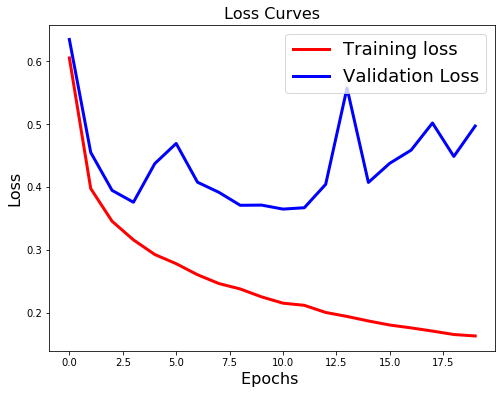

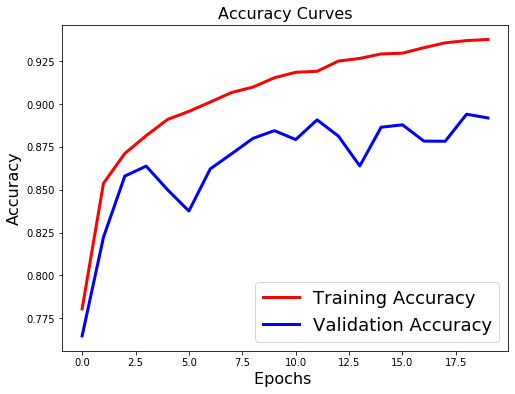

In [12]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Although the accuracy obtained above is very good, if you see the loss and accuracy curves in the above figures, you’ll notice that the validation loss initially decrease, but then it starts increasing gradually. Also, there is a substantial difference between the training and test accuracy. This is a clear sign of Overfitting which means that the network has memorized the training data very well, but is not guaranteed to work on unseen data. Thus, the difference in the training and test accuracy.

# <font style="color:rgb(50,120,229)">7. Add Regularization to the model</font>
Overfitting occurs mainly because the network parameters are getting too biased towards the training data. We can add a `dropout` layer to overcome this problem to a certain extent. In case of dropout, a fraction of neurons is randomly turned off during the training process, reducing the dependency on the training set by some amount.

In [13]:
from tensorflow.keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

# <font style="color:rgb(50,120,229)">8. Check performance after regularization</font>
We will train the network again in the same way we did earlier and check the loss and accuracy curves.

In [14]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# To see detail output, change verbose to True
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=False, 
                            validation_data=(test_data, test_labels_one_hot))
 

Text(0.5, 1.0, 'Accuracy Curves')

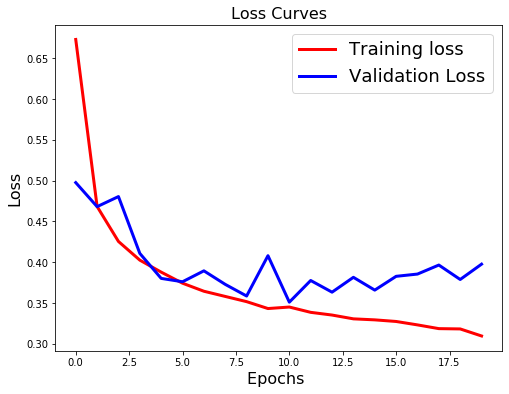

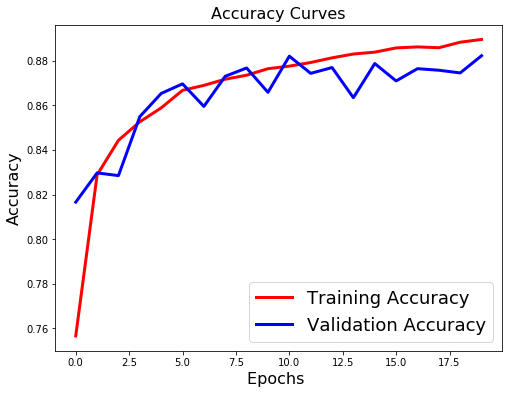

In [15]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

From the above loss and accuracy curves, we can observe that

- The validation loss is not increasing
- The difference between the train and validation accuracy is not very high

# <font style="color:rgb(50,120,229)">9. Inference on a single image</font>

We have seen that the first image in the test set is the label `9` which corresponds to `Ankle boot`.  Let us see what the model predicts.


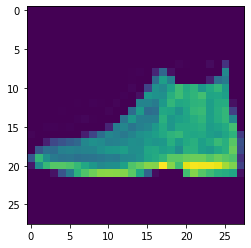

In [16]:
testSample = test_images[0,:,:]
plt.imshow(testSample)

## <font style="color:rgb(50,120,229)">9.1. Getting the predicted class</font>
During the inference stage, it might be sufficient to know the class of the input data. It can be done as follows.

In [17]:
# Predict the most likely class
label = model_reg.predict_classes(test_data[[0],:])[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))

Label = 9, Item = Ankle boot


## <font style="color:rgb(50,120,229)">9.2. Getting the probabilities</font>
In the above method there is no score which tells us about the confidence with which the model does the prediction. In some cases, for example when there are many classes, we may want the probabilities of the different classes which indicates how confident the model is about the occurence of a particular class. We can take the decision based on these scores.

In [18]:
# Predict the probabilities for each class 
prob = model_reg.predict(test_data[[0],:])
labelProb = prob[0][label]
print("Probability = {:.3f}".format(labelProb))

Probability = 0.977


## <font style="color:rgb(50,120,229)">Exercise</font>
1. Try to increase the accuracy of the model. Some of the approaches you can try are:
    1. Increase the number of layers
    2. Increase the number of neurons
    3. Change the regularization parameter
2. Try to use `mnist` data instead of `fashion_mnist` and check the accuracy. 